In [1]:
import os
import re
from PIL import Image
import numpy as np

def read_images(directory):
    x_train = []
    y_train = []
    target_width = 92
    target_height = 112
    
    # Loop through each friend's directory in the train directory
    for friend_dir in os.listdir(directory):
        friend_path = os.path.join(directory, friend_dir)
        
        # Check if the path is a directory
        if os.path.isdir(friend_path):
            print(f"Processing directory: {friend_path}")  # Print the current directory being processed
            
            # Loop through each image in the friend's directory
            for image_file in os.listdir(friend_path):
                image_path = os.path.join(friend_path, image_file)
                
                try:
                    # Check if the file is an image
                    if os.path.isfile(image_path) and image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                        # Open the image using PIL and convert to grayscale
                        img = Image.open(image_path).convert('L')
                        
                        # Resize the image to a consistent shape
                        img = img.resize((target_width, target_height))
                        
                        # Convert the image to numpy array
                        img_array = np.array(img)
                        
                        # Append the image array to x_train
                        x_train.append(img_array)

                        # Extract the friend's name from the image filename
                        friend_name = extract_friend_name(image_file)

                        # Append the friend's name to y_train
                        y_train.append(friend_name)
                except Exception as e:
                    print(f"Error reading image {image_path}: {e}")
    
    return np.array(x_train), np.array(y_train)

def extract_friend_name(image_filename):
    # Extract friend's name from the image filename
    if '_' in image_filename:
        friend_name = image_filename.split('_')[0]  # Assuming friend's name is before the first underscore
    else:
        # If underscore is not present, find the index of the first number
        idx = next((i for i, c in enumerate(image_filename) if c.isdigit()), None)
        if idx is not None:
            friend_name = image_filename[:idx]  # Extract name before the first number
        else:
            friend_name = image_filename.split('.')[0]  # Assuming friend's name is before the first dot (.)
    return friend_name

# Provide the path to the train directory
train_directory = r"F:\Sem6\Computer Vision\Lab\Lab8\Train"  # Use raw string literal to avoid escaping backslashes

# Read images and corresponding labels
x_train, y_train = read_images(train_directory)

# Print the shape of x_train and y_train
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)

# Print all unique labels
unique_labels = np.unique(y_train)
print("Unique labels:", unique_labels)


Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 files from Aadit Sharma on Mar 5, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 files from Aman Verma on Mar 4, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 files from Anudeep Talari on Mar 4, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 files from Anurag Deo on Mar 4, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 files from Archit Sharma on Mar 5, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 files from Aritra Bhaduri on Mar 4, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 files from Arkadeep Acharya on Mar 4, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 files from Aryan Sahoo on Mar 5, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 files from Ashutosh Kumar on Mar 5, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 fil

In [2]:
len(unique_labels)

35

In [3]:
test_directory = r"F:\Sem6\Computer Vision\Lab\Lab8\Test"

x_test, y_test = read_images(test_directory)

print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

unique_labels = np.unique(y_test)
print("Unique labels:", unique_labels)

Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Test\5 files from Aadit Sharma on Mar 5, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Test\5 files from Aman Verma on Mar 4, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Test\5 files from Anudeep Talari on Mar 4, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Test\5 files from Anurag Deo on Mar 4, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Test\5 files from Archit Sharma on Mar 5, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Test\5 files from Aritra Bhaduri on Mar 4, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Test\5 files from Arkadeep Acharya on Mar 4, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Test\5 files from Aryan Sahoo on Mar 5, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Test\5 files from Ashutosh kumar on Mar 5, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Test\5 files from Atul Kumar o

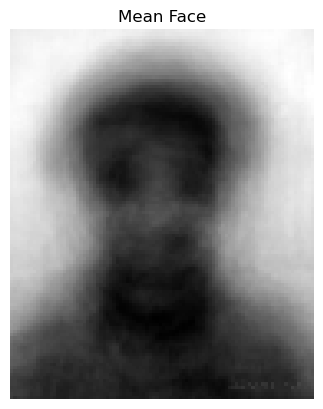

In [11]:
import matplotlib.pyplot as plt
def compute_mean(images):
    mean_face = np.mean(images, axis=0)
    return mean_face

def normalize_images(images, mean_face):
    images_centered = images - mean_face
    return images_centered

mean_face = compute_mean(x_train)

plt.imshow(mean_face, cmap='gray')
plt.title('Mean Face')
plt.axis('off')
plt.show()


x_train_normalized = normalize_images(x_train, mean_face)
x_test_normalized = normalize_images(x_test, mean_face)


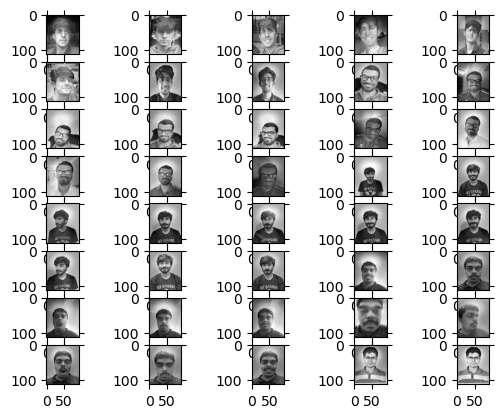

In [14]:
height = 112
width = 92
for i in range(40):
    img = x_train_normalized[i+2].reshape(height,width)
    plt.subplot(8,5,1+i)
    plt.imshow(img, cmap='gray')
    #plt.subplots_adjust(right=1.2, top=1.2)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [17]:
print(x_train_normalized.shape)

(350, 112, 92)


In [18]:
num_samples, height, width = x_train_normalized.shape
x_train_flattened = x_train_normalized.reshape(num_samples, height * width)

cov_matrix = np.cov(x_train_flattened.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]


d:\Anaconda\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\Anaconda\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


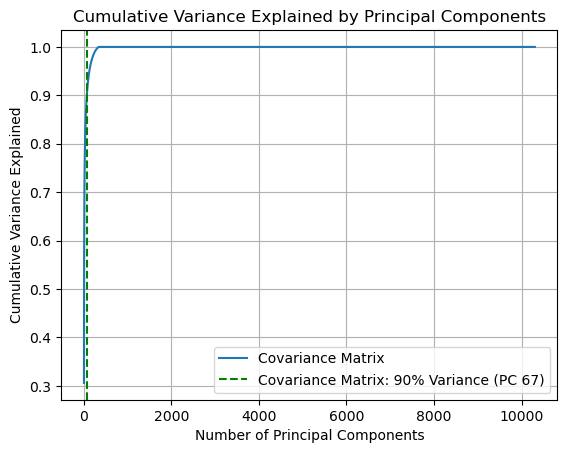

In [21]:
import matplotlib.pyplot as plt

cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

index_90 = np.argmax(cumulative_variance >= 0.90) + 1

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, label='Covariance Matrix')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.legend()
plt.grid(True)

plt.axvline(x=index_90, color='g', linestyle='--', label=f'Covariance Matrix: 90% Variance (PC {index_90})')

plt.legend()
plt.show()

In [23]:
reduced_data = np.array(eigenvectors[:70]).transpose()
reduced_data.shape

(10304, 70)

In [25]:
trans_reduced_data = reduced_data.T

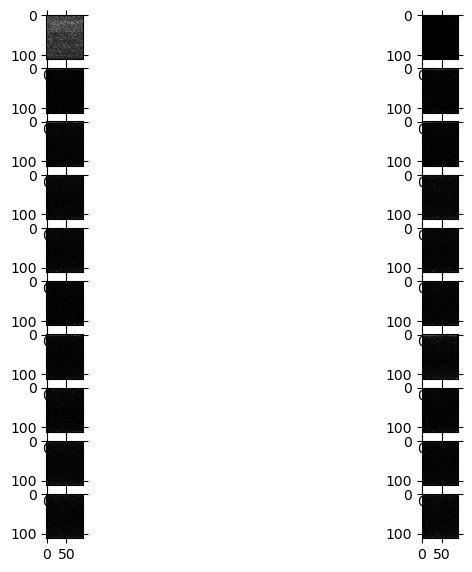

In [28]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(20):
    img = np.abs(trans_reduced_data[i].reshape(height, width))

    plt.subplot(10, 2, 1 + i)
    plt.imshow(img, cmap='gray')
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off', top='off', right='off', left='off', which='both')

plt.show()

In [73]:
w = np.array([np.dot(trans_reduced_data,i) for i in x_train_flattened])
print(w.shape)

(350, 70)


In [42]:
def recogniser(y_test, y_train, proj_data, w, t0, prn=False):

    num_images = len(y_test)
    correct_pred = 0

    result = []
    wts = []

    FMR_count = 0
    FNMR_count = 0

    for i in range(len(y_test)):
        unknown_face_vector = x_test[i].flatten()
        
        mean_face_reshaped = mean_face.flatten()
        
        normalised_uface_vector = np.subtract(unknown_face_vector, mean_face_reshaped)

        w_unknown = np.dot(proj_data, normalised_uface_vector)
        diff = w - w_unknown
        norms = np.linalg.norm(diff, axis=1)
        index = np.argmin(norms)

        wts.append([i, norms[index]])

        match = y_test[i] == y_train[index]

        if norms[index] < t0:  # It's a face
            if match:
                correct_pred += 1
                result.append(1)
            else:
                result.append(0)
                FMR_count += 1
        else:
            if match:
                FNMR_count += 1
            else:
                correct_pred += 1

        # Print the input image, matched image, and norm
        if prn:
            print(f"Input:{y_test[i]}\tMatched:{y_train[index]}\t{norms[index]}")

    FMR = FMR_count / num_images
    FNMR = FNMR_count / num_images

    print('Correct predictions: {}/{} = {} \t\t'.format(correct_pred, num_images, correct_pred / num_images), end=' ')
    print('FMR: {} \t'.format(FMR), end=' ')
    print('FNMR: {} \t'.format(FNMR))

    return wts, result, correct_pred, num_images, FMR, FNMR


wts, result, correct_pred, num_images, FMR, FNMR = recogniser(y_test, y_train, trans_reduced_data, w, t0=1e7, prn=True)


Input:aadit	Matched:aadit	120.7759539188013
Input:aadit	Matched:aadit	217.08640401100462
Input:aadit	Matched:deshik	182.21880423310913
Input:aadit	Matched:deshik	158.24702360907992
Input:aadit	Matched:lalit	163.37278905596747
Input:Aman	Matched:deshik	137.57740044702027
Input:Aman	Matched:Aman	148.03214425824567
Input:Aman	Matched:Pichikala	158.30001925996083
Input:Aman	Matched:prakash	157.30333948496283
Input:Aman	Matched:Aman	176.7933609249966
Input:Anudeep	Matched:deshik	201.6984405211067
Input:Anudeep	Matched:Anudeep	158.8690317475541
Input:Anudeep	Matched:aadit	160.01502387075053
Input:Anudeep	Matched:eshwar	156.7894926350397
Input:Anudeep	Matched:prakash	206.01372520355466
Input:Anurag	Matched:Anudeep	156.1713673851926
Input:Anurag	Matched:Anurag	34.95674929900931
Input:Anurag	Matched:Anurag	184.54945663336042
Input:Anurag	Matched:aadit	160.986281483928
Input:Anurag	Matched:aadit	186.85210604160244
Input:Archit	Matched:Archit	124.94745337791734
Input:Archit	Matched:deshik	117.781

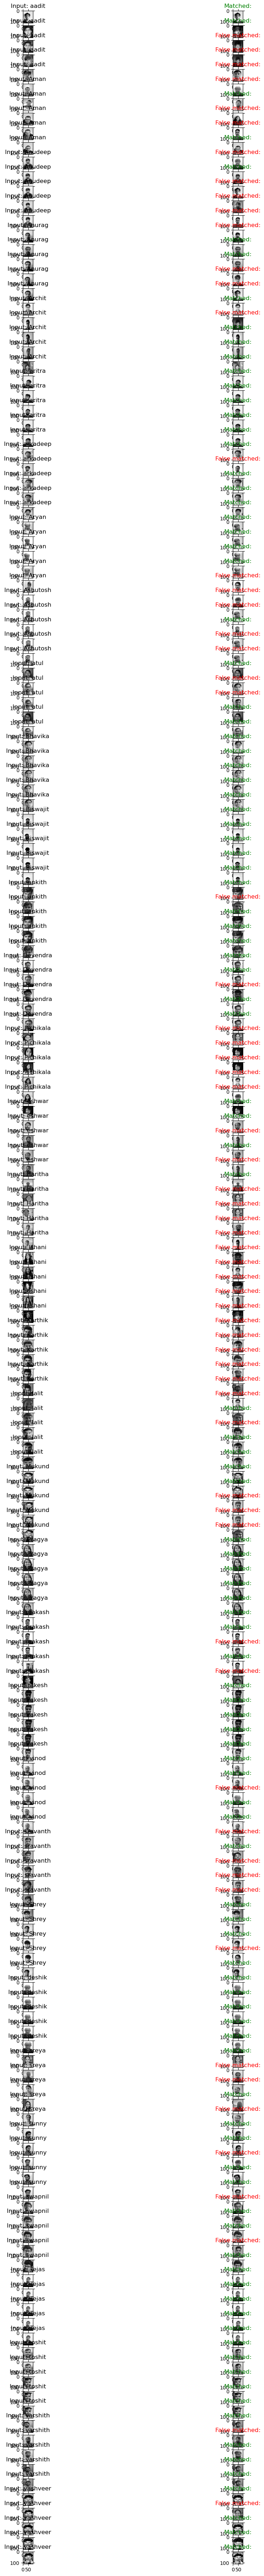

In [55]:
count = 0
num_images = 0
correct_pred = 0

def Visualization(img, imgname, x_train, y_train, trans_reduced_data, w, t0):
    global count, num_images, correct_pred
    num_images += 1

    unknown_face_vector = np.array(img, dtype='float64').flatten()
    mean_face = np.mean(x_train, axis=0)
    normalised_uface_vector = np.subtract(unknown_face_vector, mean_face.flatten())

    plt.subplot(176, 2, 1 + count)
    plt.imshow(img, cmap='gray')
    plt.title('Input: ' + imgname)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off', top='off', right='off', left='off', which='both')
    count += 1

    w_unknown = np.dot(trans_reduced_data, normalised_uface_vector)
    diff = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)

    plt.subplot(176, 2, 1 + count)
    if norms[index] < t0:  # It's a face
        match = imgname == y_train[index]
        if match:
            plt.title('Matched:', color='g')
            plt.imshow(x_train[index].reshape(112, 92), cmap='gray')
            correct_pred += 1
        else:
            plt.title('False matched:', color='r')
            plt.imshow(x_train[index].reshape(112, 92), cmap='gray')
    else:
        if imgname.split('_')[0] not in [i.split('_')[0] for i in y_train]:
            plt.title('Unknown face', color='g')
            correct_pred += 1
        else:
            plt.title('Unknown face', color='r')

    plt.tick_params(labelleft='off', labelbottom='off', bottom='off', top='off', right='off', left='off',
                    which='both')
    plt.subplots_adjust(right=1.2, top=2.5)

    count += 1


fig = plt.figure(figsize=(10, 30))

for i in range(len(y_test)):
    Visualization(x_test[i], y_test[i], x_train, y_train, trans_reduced_data, w, t0=2.7e7)

plt.show()


# Task3

KeyboardInterrupt: 

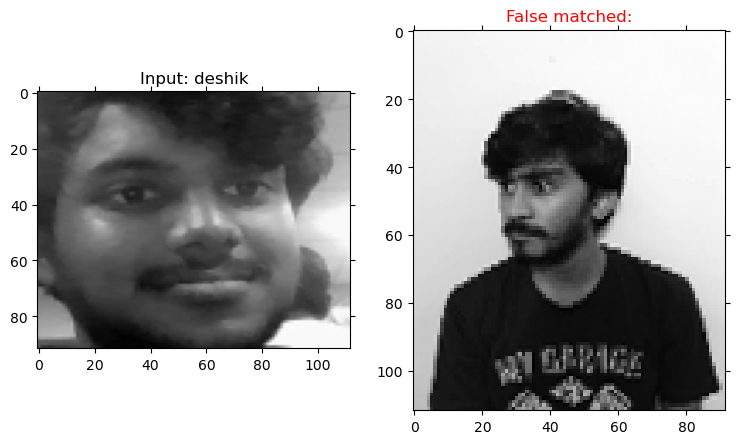

In [79]:
import cv2
import numpy as np

def check(img, imgname, x_train, y_train, trans_reduced_data, w, t0):

    unknown_face_vector = np.array(img, dtype='float64').flatten()
    mean_face = np.mean(x_train, axis=0)
    normalised_uface_vector = np.subtract(unknown_face_vector, mean_face.flatten())

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Input: ' + imgname)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off', top='off', right='off', left='off', which='both')

    w_unknown = np.dot(trans_reduced_data, normalised_uface_vector)
    #print(f"w_unkown: {w_unknown} ")
    diff = w - w_unknown
    #print(f"diff: {diff}")
    norms = np.linalg.norm(diff, axis=1)
    #print(norms)
    index = np.argmin(norms)

    plt.subplot(1, 2, 2)
    if norms < t0:  # It's a face
        match = imgname == y_train[index]
        if match:
            plt.title('Matched:', color='g')
            plt.imshow(x_train[index].reshape(112, 92), cmap='gray')
            correct_pred += 1
        else:
            plt.title('False matched:', color='r')
            plt.imshow(x_train[index].reshape(112, 92), cmap='gray')

    plt.tick_params(labelleft='off', labelbottom='off', bottom='off', top='off', right='off', left='off',
                    which='both')
    plt.subplots_adjust(right=1.2, top=2.5)


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_and_analyze_faces(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w].copy()
        face = cv2.resize(face, (112, 92))
        result = check(face, 'deshik', x_train, y_train, trans_reduced_data, w, 2e7)
        
        # Display the result on the frame
        if result == "Match":
            color = (0, 255, 0)  # Green color for a match
        else:
            color = (0, 0, 255)  # Red color for no match
        cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
    
    return frame

def start_live_interface():
    cap = cv2.VideoCapture(0)  # Use the default webcam
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Detect and analyze faces in the frame
        frame = detect_and_analyze_faces(frame)

        # Display the resulting frame
        cv2.imshow('Face Detection', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

start_live_interface()
